### PART 1: Scraping the data from websites for the Bitcoin (BTC) News CryptoCurrency using Selenium.
    

In [1]:
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from pandas import Timestamp
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.action_chains import ActionChains

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import time

from datetime import datetime, timedelta
from xgboost import XGBClassifier

import pandas as pd
import numpy as np
from dateutil.parser import parse
import datetime

In [ ]:
driver_path="./chromedriver"
webpage="https://cryptonews.net/en/news/bitcoin/"

csv_filename='BTC_news_2.csv'

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())

In [ ]:
# Move Down the page and find the elements related to 'Bitcoin' 
driver.get(webpage)

elem = driver.find_element_by_tag_name("body")

no_of_pagedowns = 90000         # eventhough with 90000 pagedowns i get 800 rows of data.

while no_of_pagedowns:
    elem.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)
    no_of_pagedowns -= 1


# Find the elements
content_div = driver.find_element_by_xpath("//div[@class='content row']")
news_divs = content_div.find_elements_by_xpath(".//div[@class='row news-item start-xs']")

In [ ]:
# Create a csv file
with open(csv_filename, 'w', newline='') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    array = ['Date', 'Title', 'Source']
    filewriter.writerow(array)
    
with open(csv_filename, 'a') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')

    for news_div in news_divs:

        title = news_div.get_attribute('data-title')
        source = news_div.get_attribute('data-link')
        date = news_div.find_element_by_xpath(".//span[@class='datetime flex middle-xs']").text

        filewriter.writerow([date, title, source])

In [ ]:
df = pd.read_csv('BTC_news_2.csv', encoding='latin-1' )
df.head()

In [ ]:
df.shape

In [ ]:
df.tail(20)

#### I was not able to scrape alot of data using Selenium and webdriver because it was taking a lot of time to process and many times the loop just gave a failed error.

### So Now I used parsehub application to Scape the Data from the website --> https://cointelegraph.com/
### To check upon the Historical News

In [ ]:
file_1 = pd.read_csv(r'D:\internship\datasets\newsxx.csv')
file_2 = pd.read_csv(r'D:\internship\datasets\News\news_cointelegraph.csv')

In [ ]:
file_1.head()

In [ ]:
file_1 = file_1.drop_duplicates('headline', keep='last')
file_1.shape

In [ ]:
file_1.shape, file_2.shape

In [ ]:
col = ['headline', 'date', 'extra']

file_1.columns = col

In [ ]:
type(file_1.date[0])

In [ ]:
col = ['headline', 'date', 'extra']

file_2.columns = col

In [ ]:
file_2.head(20)

In [ ]:
for news_time in range(len(file_2['date'][:11])):
    file_2['date'][news_time] = 'Feb 22, 2021'

In [ ]:
file_2.head()

#### I take both the scraped news files and concat them to get a larger dataset

In [ ]:
file_1.shape[0] + file_2.shape[0]

In [ ]:
final_df_news = pd.concat([file_2, file_1],ignore_index=True, axis=0)

In [ ]:
final_df_news.head()

In [ ]:
final_df_news.tail()

In [ ]:
final_df_news.shape

In [ ]:
from dateutil import parser
datee = []

for i in range(len(final_df_news)):
    datee.append(parser.parse(final_df_news.date[i]))
 
    


# # datee = datee.reshape(-1,1)
# # print(datee.shape)


for i in range(0, len(final_df_news.index)):
    final_df_news.date[i] = datee[i]

final_df_news.head(20)
    
# # dt = parse('Feb 22, 2021')

# print(dt.strftime('%d/%m/%Y'))

In [ ]:
final_df_news.tail(20)

In [ ]:
# from datetime import date, timedelta
# yesterday = date.today() - timedelta(days=1)
# x = yesterday.strftime('%d%m%y')

In [ ]:
isinstance(datee[0], datetime.date)

In [ ]:
final_df_news.info()

In [ ]:
final_df_news.to_csv('final_news.csv', index=False)

## Scraping Cointomarket prices

In [ ]:
from cryptocmd import CmcScraper

In [ ]:
scraper = CmcScraper("BTC", "29-04-2013", "23-02-2021")

In [ ]:
headers, data = scraper.get_data()

In [ ]:
json_data = scraper.get_data("json")

In [ ]:
scraper.export("csv")

In [ ]:
df_prices = scraper.get_dataframe()

In [ ]:
df_prices.head()

In [ ]:
df_prices.info()

In [ ]:
# driver_path="./chromedriver"
# webpage="https://coinmarketcap.com/currencies/bitcoin/historical-data/"
# csv_filename ='btc_vs_usd.csv'

In [ ]:
# Create a new instance of the Chrome driver
# import time, datetime
# from datetime import datetime

# driver = webdriver.Chrome(ChromeDriverManager().install())



In [ ]:
# start_time = time.time()
# # Go to the webpage
# driver.get(webpage)

# # Find the elements
# table_div = driver.find_element_by_xpath("//div[@class='cmc-table__table-wrapper-outer']")
# rows = table_div.find_elements_by_xpath(".//tr[@class='cmc-table-row']")

# scraping_time = (time.time() - start_time)
# print("Scraping Time: %s" % datetime.timedelta(seconds=scraping_time))

In [ ]:
# # Create a csv file
# with open(csv_filename, 'w', newline='') as csvfile:
#     filewriter = csv.writer(csvfile, delimiter=',')
#     array = ['date', 'open', 'close', 'high', 'low', 'change', 'volume', 'market_cap']
#     filewriter.writerow(array)

# def remove_comma(field):
#     field = field.replace(',', '')
#     return field

# # Write entries to csv file
# with open(csv_filename, 'a') as csvfile:
#     filewriter = csv.writer(csvfile, delimiter=',')

#     for row in rows:
#         fields = row.text.split('\n')

#         date = fields[0]
#         date = pd.to_datetime(date).date()

#         open_ = fields[1]
#         high = fields[2]
#         low = fields[3]
#         close = fields[4]
#         volume = fields[5]
#         market_cap = fields[6]
        
#         # Remove the commas in the fields
#         open_ = remove_comma(open_)
#         high = remove_comma(high)
#         low = remove_comma(low)
#         close = remove_comma(close)
#         volume = remove_comma(volume)
#         market_cap = remove_comma(market_cap)

#         price_change = (float(close) - float(open_))
#         change = (100 * price_change) / float(open_)
#         change = round(change, 2)
                  
#         filewriter.writerow([date, open_, close, high, low, change, volume, market_cap])

### PART 2: Getting the Final data after above steps and starting the EDA with Decision making

In [2]:
df_news = pd.read_csv(r'D:\internship\final_news.csv')

In [3]:
df_news.head()

,headline,date,extra
0,3 Bitcoin price metrics show bulls were not fa...,2021-02-22 00:00:00,Today’s $1.6 billion Bitcoin liquidation event...
1,Can’t beat ‘em? Join ‘em: Mastercard and Visa ...,2021-02-22 00:00:00,Mastercard is set to open the shop doors to cr...
2,Up to 5% of public companies will follow Tesla...,2021-02-22 00:00:00,"Dan Ives, Wedbush Securities’ managing directo..."
3,Bitcoin prints biggest hourly candle in histor...,2021-02-22 00:00:00,Fresh criticism from the U.S. treasury secreta...
4,"Bitcoin price crashes below $48K, but is the b...",2021-02-22 00:00:00,"Bitcoin price dropped below $48,000 in a major..."


In [4]:
df_prices = pd.read_csv('D:\internship\datasets\Price\BTC_29-04-2013_22-02-2021.csv')

In [5]:
df_prices.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,22-02-2021,57532.738864,57533.389325,48967.565188,54207.319065,9.205242e+10,1.010205e+12
1,21-02-2021,56068.568246,58330.572142,55672.609513,57539.943668,5.189759e+10,1.072263e+12
2,20-02-2021,55887.335714,57505.228187,54626.559776,56099.520513,6.814546e+10,1.045371e+12
3,19-02-2021,51675.981285,56113.650547,50937.275722,55888.133682,6.349550e+10,1.041381e+12
4,18-02-2021,52140.972717,52474.107249,51015.764554,51679.796694,5.205472e+10,9.629151e+11


In [6]:
df_prices.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
2852,03-05-2013,106.250000,108.127998,79.099998,97.750000,0.0,1.085995e+09
2853,02-05-2013,116.379997,125.599998,92.281898,105.209999,0.0,1.168517e+09
2854,01-05-2013,139.000000,139.889999,107.720001,116.989998,0.0,1.298955e+09
2855,30-04-2013,144.000000,146.929993,134.050003,139.000000,0.0,1.542813e+09
2856,29-04-2013,134.444000,147.488007,134.000000,144.539993,0.0,1.603769e+09


In [7]:
df_news.shape, df_prices.shape

((19812, 3), (2857, 7))

In [8]:
df_news.columns

Index(['headline', 'date', 'extra'], dtype='object')

In [9]:
df_news.isnull().sum()

headline    0
date        0
extra       0
dtype: int64

In [10]:
df_prices.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [11]:
isinstance(df_prices.Date[0], datetime.date)

False

In [12]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])

In [13]:
isinstance(df_prices.Date[100], datetime.date)

True

In [14]:
date_index = df_news.groupby(['date']).groups


In [15]:
keys = list(date_index.keys())

In [16]:
dict = {}

for key in keys:
    titles = df_news[df_news['date'] == key]['headline']
    titles = titles.values.tolist()
    dict[key] = titles
    
df_grouped_news = pd.DataFrame(list(dict.values()))
df_grouped_news.insert(0, "date", keys)
df_grouped_news.head()

,date,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,40,41
0,2017-01-01 00:00:00,Colombia Declares Bitcoin and Other Digital Cu...,Bitcoin Consolidation Continues,"The price of bitcoin passed $1,000 during the ...",The New Year Could Bode Well for Bitcoin and B...,Bitcoin Starts 2017 at the $1000,The European Union Wants to Identify Bitcoin U...,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2017-01-02 00:00:00,Many of the government leaders queried by IBM ...,Bitcoin Exchange Coin.mx Criminal Case Sees Mu...,Four Blockchain Use Cases For Banks,Dutch Banking Giant ING Conducts 27 Blockchain...,No Primary Litecoin Pool Will Upgrade to Segwi...,Study: 18-34 Age Group Optimistic Over UK Econ...,Bitcoin Price Crosses $975 as Global Political...,Bitcoin Has Pressed Through Resistance,Abu Dhabi’s Largest Bank Just Launched Blockch...,...,None,None,None,None,None,None,None,None,None,None
2,2017-01-03 00:00:00,Bitcoin prices keep reaching new all-time high...,Cryptocurrency exchange Kraken has announced t...,A new blockchain-focused nonprofit organizatio...,An official from Japan’s central bank invoked ...,The community around ethereum classic is plann...,CoinDesk Research highlights the key findings ...,A deputy governor for the Reserve Bank of Indi...,The founding members of the Ethereum Enterpris...,Thailand's national stock exchange is reported...,...,None,None,None,None,None,None,None,None,None,None
3,2017-01-04 00:00:00,Gold Supply Rises With Large Mine Discovery Bi...,Blockchain Entertainment Studio Ropes in Holly...,Bitcoin Reaches a Grand Compromise on the Scal...,European Commission Considers Passporting Righ...,Companies Adopt Blockchain to Enhance Security...,The Week in Review: Cryptocurrencies Shine as...,Bitcoin prices surpassed those of gold earlier...,Bitcoin or gold? Picking one over the other as...,None,...,None,None,None,None,None,None,None,None,None,None
4,2017-01-05 00:00:00,Decentralized exchange 0x just raised an unusu...,"Following a controversial distribution, predic...",Norway’s central bank is in the early stages o...,"The price of bitcoin rose above $1,400 today, ...",Silkroad-Like Drug Market AlphaBay Starts Acc...,Ether prices have climbed above $80 per token ...,US Defense Contractor Lockheed Martin Incorpor...,"Starting today, the UN will begin distributing...",Ethereum Soars Above $80 Reaches $7 Billion Ma...,...,None,None,None,None,None,None,None,None,None,None


In [17]:
df_grouped_news.shape

(1379, 43)

In [18]:
df_prices.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2021-02-22,57532.738864,57533.389325,48967.565188,54207.319065,9.205242e+10,1.010205e+12
1,2021-02-21,56068.568246,58330.572142,55672.609513,57539.943668,5.189759e+10,1.072263e+12
2,2021-02-20,55887.335714,57505.228187,54626.559776,56099.520513,6.814546e+10,1.045371e+12
3,2021-02-19,51675.981285,56113.650547,50937.275722,55888.133682,6.349550e+10,1.041381e+12
4,2021-02-18,52140.972717,52474.107249,51015.764554,51679.796694,5.205472e+10,9.629151e+11


In [19]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_grouped_news['date'] = pd.to_datetime(df_grouped_news['date'])

In [20]:
type(df_grouped_news['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df_grouped_news = df_grouped_news.rename(columns={'date': 'Date'})

In [22]:
df_grouped_news.shape, df_prices.shape

((1379, 43), (2857, 7))

In [23]:
# df_prices[df_prices['Date'] == '2020-08-20']

In [24]:
combined_data = pd.merge(df_grouped_news, df_prices, on='Date', how='inner')
combined_data.tail()

,Date,0,1,2,3,4,5,6,7,8,...,38,39,40,41,Open,High,Low,Close,Volume,Market Cap
1354,2021-02-18,Debut Canadian Bitcoin ETF nears $100 million ...,Bitcoin trader explains why BTC outperforming ...,'Insane' Bitcoin price consolidation means $48...,Swiss canton of Zug starts accepting tax payme...,US crypto exchange suspends XRP trading in lig...,Bitcoin whales continue to accumulate despite ...,Russian crypto mining firm scrambles to meet f...,Europe’s most successful soccer club just got ...,Motley Fool adding Bitcoin to its ‘10X portfol...,...,None,None,None,None,52140.972717,52474.107249,51015.764554,51679.796694,5.205472e+10,9.629151e+11
1355,2021-02-19,$56.3K Bitcoin price and $1T market cap signal...,Bitcoin’s market cap flipped Tencent on its wa...,Cointelegraph commemorates Bitcoin hitting $50...,Data shows bulls are in charge of this month’s...,"Price analysis 2/19: BTC, ETH, BNB, DOT, ADA, ...",OKCoin delists two Bitcoin forks over ‘malicio...,You’ve got the power? Legacy banks aim high wi...,"Bitcoin price hits $54K, reaching a $1T market...",Bitcoin’s market cap breaks $1 trillion after ...,...,None,None,None,None,51675.981285,56113.650547,50937.275722,55888.133682,6.349550e+10,1.041381e+12
1356,2021-02-20,Bitcoin skeptic debates Bloomberg analyst in l...,"Elon Musk says BTC, ETH prices “high” while du...",Bitcoin price must now hold above these levels...,The perils of a decentralized web living in th...,In the eye of the beholder: What gives Bitcoin...,None,None,None,None,...,None,None,None,None,55887.335714,57505.228187,54626.559776,56099.520513,6.814546e+10,1.045371e+12
1357,2021-02-21,"Banks will be required to work with crypto, e-...",A Bitcoin price dip for ants? BTC quickly rebo...,None,None,None,None,None,None,None,...,None,None,None,None,56068.568246,58330.572142,55672.609513,57539.943668,5.189759e+10,1.072263e+12
1358,2021-02-22,3 Bitcoin price metrics show bulls were not fa...,Can’t beat ‘em? Join ‘em: Mastercard and Visa ...,Up to 5% of public companies will follow Tesla...,Bitcoin prints biggest hourly candle in histor...,"Bitcoin price crashes below $48K, but is the b...",Fuel for a broader Bitcoin rally? BTC dip fill...,Swiss crypto ETP issuer passes $1B assets unde...,South Korea fast tracks 20% tax on Bitcoin and...,Did $50K 'trigger' Peter Schiff to buy BTC? 5 ...,...,None,None,None,None,57532.738864,57533.389325,48967.565188,54207.319065,9.205242e+10,1.010205e+12


In [25]:
combined_data.shape

(1359, 49)

### PART 3: Decision Making

####  As I dont have my dependent variable, i will calculate it using the below formula

#### change =  (Close - open) / open

#### and then turn the change values into 0 or 1 if negative and positive repectively.

In [26]:
combined_data.columns

Index([      'Date',            0,            1,            2,            3,
                  4,            5,            6,            7,            8,
                  9,           10,           11,           12,           13,
                 14,           15,           16,           17,           18,
                 19,           20,           21,           22,           23,
                 24,           25,           26,           27,           28,
                 29,           30,           31,           32,           33,
                 34,           35,           36,           37,           38,
                 39,           40,           41,       'Open',       'High',
              'Low',      'Close',     'Volume', 'Market Cap'],
      dtype='object')

In [27]:
combined_data["Close"].isnull().sum()

0

[]

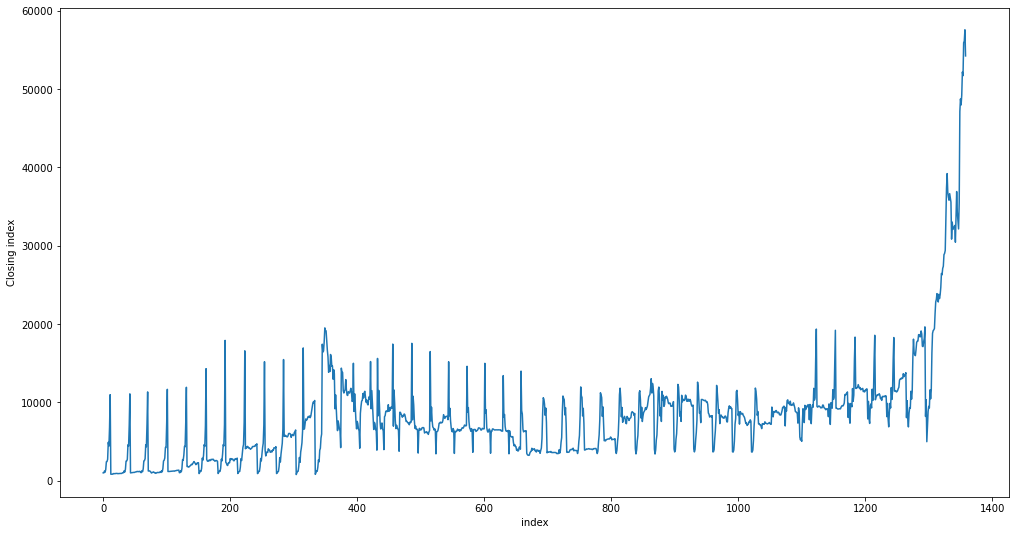

In [28]:
plt.figure(figsize = (17,9))
plt.plot(combined_data["Close"])
plt.xlabel('index')
plt.ylabel('Closing index')
plt.plot()

In [29]:
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

In [30]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# combined_data['label'] = scaler.fit_transform(np.array(combined_data["Close"]).reshape(-1,1))

In [31]:
combined_data.head(40)

,Date,0,1,2,3,4,5,6,7,8,...,38,39,40,41,Open,High,Low,Close,Volume,Market Cap
0,2017-01-01,Colombia Declares Bitcoin and Other Digital Cu...,Bitcoin Consolidation Continues,"The price of bitcoin passed $1,000 during the ...",The New Year Could Bode Well for Bitcoin and B...,Bitcoin Starts 2017 at the $1000,The European Union Wants to Identify Bitcoin U...,None,None,None,...,None,None,None,None,963.658020,1003.080017,958.698975,998.325012,1.477750e+08,1.605041e+10
1,2017-01-02,Many of the government leaders queried by IBM ...,Bitcoin Exchange Coin.mx Criminal Case Sees Mu...,Four Blockchain Use Cases For Banks,Dutch Banking Giant ING Conducts 27 Blockchain...,No Primary Litecoin Pool Will Upgrade to Segwi...,Study: 18-34 Age Group Optimistic Over UK Econ...,Bitcoin Price Crosses $975 as Global Political...,Bitcoin Has Pressed Through Resistance,Abu Dhabi’s Largest Bank Just Launched Blockch...,...,None,None,None,None,970.940979,989.114014,970.742004,989.023010,1.501100e+08,1.596202e+10
2,2017-01-03,Bitcoin prices keep reaching new all-time high...,Cryptocurrency exchange Kraken has announced t...,A new blockchain-focused nonprofit organizatio...,An official from Japan’s central bank invoked ...,The community around ethereum classic is plann...,CoinDesk Research highlights the key findings ...,A deputy governor for the Reserve Bank of Indi...,The founding members of the Ethereum Enterpris...,Thailand's national stock exchange is reported...,...,None,None,None,None,1180.040039,1222.500000,1179.689941,1222.500000,2.290570e+08,1.979446e+10
3,2017-01-04,Gold Supply Rises With Large Mine Discovery Bi...,Blockchain Entertainment Studio Ropes in Holly...,Bitcoin Reaches a Grand Compromise on the Scal...,European Commission Considers Passporting Righ...,Companies Adopt Blockchain to Enhance Security...,The Week in Review: Cryptocurrencies Shine as...,Bitcoin prices surpassed those of gold earlier...,Bitcoin or gold? Picking one over the other as...,None,...,None,None,None,None,1071.709961,1091.719971,1061.089966,1080.500000,2.896340e+08,1.755760e+10
4,2017-01-05,Decentralized exchange 0x just raised an unusu...,"Following a controversial distribution, predic...",Norway’s central bank is in the early stages o...,"The price of bitcoin rose above $1,400 today, ...",Silkroad-Like Drug Market AlphaBay Starts Acc...,Ether prices have climbed above $80 per token ...,US Defense Contractor Lockheed Martin Incorpor...,"Starting today, the UN will begin distributing...",Ethereum Soars Above $80 Reaches $7 Billion Ma...,...,None,None,None,None,1348.300049,1434.319946,1348.300049,1421.599976,7.136240e+08,2.317952e+10
5,2017-01-06,Russia Won’t See Bitcoin as Currency Says Cent...,A state-owned development bank in Russia has r...,ICO Pre-Analysis: Bancor Protocol,An effort to disrupt the ethereum blockchain w...,One of Japan's biggest IT corporations is expa...,USV co-founder Fred Wilson isn't all that conc...,"Publicly traded bitcoin miner BTCS, formerly k...",Congress wants answers from the Internal Reven...,Court Denies Ross Ulbricht’s Life Sentence Appeal,...,None,None,None,None,2288.330078,2448.389893,2288.330078,2407.879883,1.653180e+09,3.940763e+10
6,2017-01-07,IOTA Recovers Strongly Continues Its Rollercoa...,A new proposal from Ethereum Foundation develo...,Investment strategist Matt Prusak outlines why...,Historic legislation has been passed by the st...,Should Other Bitcoin Wallets Implement Blockch...,Long-Term Cryptocurrency Analysis: Bitcoin Et...,IOTA Partners Healthcare Providers for Blockch...,A Week to be Remembered as Euro Jumps and Cry...,Classic Ether Wallet Falls Victim to a Social ...,...,None,None,None,None,2492.600098,2515.270020,2419.229980,2434.550049,7.799140e+08,3.998006e+10
7,2017-01-08,Japanese Digital Currency Exchanges Halt Bitco...,Study Reveals 6 out of 10 Major Corporations A...,Trade Recommendation: Ethereum Entry Level,Ethereum Price Surges Past $200 as Bitcoin Jud...,Tennis Star Andy Murray Among Customers to Ple

In [32]:
val = []
for i in range(len(combined_data)):
    x1 = combined_data['Close'][i]
    x2 = combined_data['Open'][i]
    change = ((x1 - x2) / x2)
    val.append(change)

In [33]:
len(val)

1359

In [36]:
lst = []
for i in range(len(val)):
    lst.append(1 if val[i] > 0 else 0)

In [37]:
len(lst)

1359

In [38]:
val = np.array(lst)

In [39]:
val = val.reshape(-1,1)

In [40]:
val.shape

(1359, 1)

In [41]:
final_label = pd.DataFrame(val, columns = ['final_label'])

In [42]:
combined_data_new = pd.concat([combined_data, final_label], axis=1)

In [43]:
combined_data_new.head(40)

,Date,0,1,2,3,4,5,6,7,8,...,39,40,41,Open,High,Low,Close,Volume,Market Cap,final_label
0,2017-01-01,Colombia Declares Bitcoin and Other Digital Cu...,Bitcoin Consolidation Continues,"The price of bitcoin passed $1,000 during the ...",The New Year Could Bode Well for Bitcoin and B...,Bitcoin Starts 2017 at the $1000,The European Union Wants to Identify Bitcoin U...,None,None,None,...,None,None,None,963.658020,1003.080017,958.698975,998.325012,1.477750e+08,1.605041e+10,1
1,2017-01-02,Many of the government leaders queried by IBM ...,Bitcoin Exchange Coin.mx Criminal Case Sees Mu...,Four Blockchain Use Cases For Banks,Dutch Banking Giant ING Conducts 27 Blockchain...,No Primary Litecoin Pool Will Upgrade to Segwi...,Study: 18-34 Age Group Optimistic Over UK Econ...,Bitcoin Price Crosses $975 as Global Political...,Bitcoin Has Pressed Through Resistance,Abu Dhabi’s Largest Bank Just Launched Blockch...,...,None,None,None,970.940979,989.114014,970.742004,989.023010,1.501100e+08,1.596202e+10,1
2,2017-01-03,Bitcoin prices keep reaching new all-time high...,Cryptocurrency exchange Kraken has announced t...,A new blockchain-focused nonprofit organizatio...,An official from Japan’s central bank invoked ...,The community around ethereum classic is plann...,CoinDesk Research highlights the key findings ...,A deputy governor for the Reserve Bank of Indi...,The founding members of the Ethereum Enterpris...,Thailand's national stock exchange is reported...,...,None,None,None,1180.040039,1222.500000,1179.689941,1222.500000,2.290570e+08,1.979446e+10,1
3,2017-01-04,Gold Supply Rises With Large Mine Discovery Bi...,Blockchain Entertainment Studio Ropes in Holly...,Bitcoin Reaches a Grand Compromise on the Scal...,European Commission Considers Passporting Righ...,Companies Adopt Blockchain to Enhance Security...,The Week in Review: Cryptocurrencies Shine as...,Bitcoin prices surpassed those of gold earlier...,Bitcoin or gold? Picking one over the other as...,None,...,None,None,None,1071.709961,1091.719971,1061.089966,1080.500000,2.896340e+08,1.755760e+10,1
4,2017-01-05,Decentralized exchange 0x just raised an unusu...,"Following a controversial distribution, predic...",Norway’s central bank is in the early stages o...,"The price of bitcoin rose above $1,400 today, ...",Silkroad-Like Drug Market AlphaBay Starts Acc...,Ether prices have climbed above $80 per token ...,US Defense Contractor Lockheed Martin Incorpor...,"Starting today, the UN will begin distributing...",Ethereum Soars Above $80 Reaches $7 Billion Ma...,...,None,None,None,1348.300049,1434.319946,1348.300049,1421.599976,7.136240e+08,2.317952e+10,1
5,2017-01-06,Russia Won’t See Bitcoin as Currency Says Cent...,A state-owned development bank in Russia has r...,ICO Pre-Analysis: Bancor Protocol,An effort to disrupt the ethereum blockchain w...,One of Japan's biggest IT corporations is expa...,USV co-founder Fred Wilson isn't all that conc...,"Publicly traded bitcoin miner BTCS, formerly k...",Congress wants answers from the Internal Reven...,Court Denies Ross Ulbricht’s Life Sentence Appeal,...,None,None,None,2288.330078,2448.389893,2288.330078,2407.879883,1.653180e+09,3.940763e+10,1
6,2017-01-07,IOTA Recovers Strongly Continues Its Rollercoa...,A new proposal from Ethereum Foundation develo...,Investment strategist Matt Prusak outlines why...,Historic legislation has been passed by the st...,Should Other Bitcoin Wallets Implement Blockch...,Long-Term Cryptocurrency Analysis: Bitcoin Et...,IOTA Partners Healthcare Providers for Blockch...,A Week to be Remembered as Euro Jumps and Cry...,Classic Ether Wallet Falls Victim to a Social ...,...,None,None,None,2492.600098,2515.270020,2419.229980,2434.550049,7.799140e+08,3.998006e+10,0
7,2017-01-08,Japanese Digital Currency Exchanges Halt Bitco...,Study Reveals 6 out of 10 Major Corporations A...,Trade Recommendation: Ethereum Entry Level,Ethereum Price Surges Past $200 as Bitcoin Jud...,Tennis Star Andy Murray Among Customers to Ple...,Daily An

#### Splitting our combined data into the train and test sets.

In [44]:
train = combined_data_new[combined_data_new['Date'] < '20191201']
test = combined_data_new[combined_data_new['Date'] > '20191130']

# the train test size is in the ratio of 0.33

In [45]:
train.shape, test.shape

((1021, 50), (338, 50))

### PART 4: Preprocessing

In [46]:
train.columns

Index([       'Date',             0,             1,             2,
                   3,             4,             5,             6,
                   7,             8,             9,            10,
                  11,            12,            13,            14,
                  15,            16,            17,            18,
                  19,            20,            21,            22,
                  23,            24,            25,            26,
                  27,            28,            29,            30,
                  31,            32,            33,            34,
                  35,            36,            37,            38,
                  39,            40,            41,        'Open',
              'High',         'Low',       'Close',      'Volume',
        'Market Cap', 'final_label'],
      dtype='object')

In [47]:
# Removing all the punctuations from the news elements 
data_train = train.iloc[:, 1:43]
data_train.replace("[^a-zA-Z]", " ",  inplace=True, regex=True)


In [48]:
# Converting titles into lowercase.......
rows, cols = data_train.shape
for ind in range(0, cols):
    data_train[ind] = data_train[ind].str.lower()

In [49]:
len(data_train)

1021

In [50]:
titles = []

for row in range(0, rows):
    titles.append(' '.join(str(x) for x in data_train.iloc[row, 0: cols] if str(x) != 'None'))
    
titles[0]

'colombia declares bitcoin and other digital currencies illegal bitcoin consolidation continues the price of bitcoin passed        during the first day of trading in       the new year could bode well for bitcoin and blockchains bitcoin starts      at the       the european union wants to identify bitcoin users'

In [51]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus_train = []
for i in range(len(titles)):
    words = re.sub('[^a-zA-Z]',' ', titles[i])
    words = words.lower()
    words = words.split()
    stemmed = [ps.stem(word) for word in words if not word in stopwords.words('english')]
    final = ' '.join(stemmed)
    corpus_train.append(final)

In [52]:
titles[0] # no stemming and and no removal of stopwords

'colombia declares bitcoin and other digital currencies illegal bitcoin consolidation continues the price of bitcoin passed        during the first day of trading in       the new year could bode well for bitcoin and blockchains bitcoin starts      at the       the european union wants to identify bitcoin users'

In [53]:
corpus_train[0]  # after stemming and removal of stopwords

'colombia declar bitcoin digit currenc illeg bitcoin consolid continu price bitcoin pass first day trade new year could bode well bitcoin blockchain bitcoin start european union want identifi bitcoin user'

In [54]:
data_test = test.iloc[:, 1:43]

data_test.replace("[^a-zA-Z]", " ", inplace=True, regex=True)

In [55]:
rows, cols = data_test.shape
for index in range(0, cols):
    data_test[index] = data_test[index].str.lower()

In [56]:
titles_test = []

for row in range(0, len(data_test.index)):
    titles_test.append(' '.join(str(x) for x in data_test.iloc[row, 1:cols] if str(x) != 'None'))


corpus_test = []
for i in range(len(titles_test)):
    words = re.sub('[^a-zA-Z]',' ', titles_test[i])
    words = words.split()
    stemmed = [ps.stem(word) for word in words if not word in stopwords.words('english')]
    final = ' '.join(stemmed)
    corpus_test.append(final)

In [57]:
titles_test[0]  # no stemming and and no removal of stopwords

'bitcoin hovers over        as top cryptocurrencies mostly in the red st  louis federal reserve report  increased supply of altcoins will decrease btc s value what we know about yellow vests  bank run and how crypto could help it'

In [58]:
corpus_test[0]  # after stemming and removal of stopwords

'bitcoin hover top cryptocurr mostli red st loui feder reserv report increas suppli altcoin decreas btc valu know yellow vest bank run crypto could help'

#### Uptill now we have got the final word corpus.

#### We have 2 corpus  
####     1) corpus_train ---- for the training set
####     2) corpus_test ----- for the testing set

### First -------------------------------------Training model -----> RandomForest

In [59]:
countvector = CountVectorizer(ngram_range=(2,2))
traindataset = countvector.fit_transform(corpus_train)

In [60]:
countvector.get_feature_names()

['aaress fintech',
 'ab chain',
 'abalyst hong',
 'abandon alleg',
 'abandon effort',
 'abat price',
 'abc bitcoin',
 'abc full',
 'abc propos',
 'abc reveal',
 'abcor alpha',
 'abey foundat',
 'abigail johnson',
 'abil blockchain',
 'abil compli',
 'abil creat',
 'abil disrupt',
 'abil make',
 'abil overse',
 'abil pull',
 'abil reform',
 'abil send',
 'abkhazia cut',
 'abl accept',
 'abl add',
 'abl alter',
 'abl check',
 'abl deposit',
 'abl ensur',
 'abl gain',
 'abl hit',
 'abl load',
 'abl remain',
 'abl scale',
 'abl store',
 'abl take',
 'abl trade',
 'abn amro',
 'abnorm withdraw',
 'aboard invest',
 'aboard singapor',
 'abound adopt',
 'abound factor',
 'abra ad',
 'abra ceo',
 'abra founder',
 'abra get',
 'abra restrict',
 'abra user',
 'abra wallet',
 'abreast develop',
 'abroad dragonchain',
 'abroad due',
 'abrupt chang',
 'abruptli call',
 'abruptli end',
 'abruptli pull',
 'abruptli termin',
 'absenc cryptocurr',
 'absolut becom',
 'absolut beginn',
 'absolut confid',


In [61]:
randomClassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomClassifier.fit(traindataset, train['final_label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [62]:
testdataset = countvector.transform(corpus_test)

In [63]:
testdataset.shape

(338, 86861)

In [64]:
predictions_df = randomClassifier.predict(testdataset)

[[  1 147]
 [  2 188]]
              precision    recall  f1-score   support

           0       0.33      0.01      0.01       148
           1       0.56      0.99      0.72       190

    accuracy                           0.56       338
   macro avg       0.45      0.50      0.36       338
weighted avg       0.46      0.56      0.41       338

Accuracy score: 0.5591715976331361


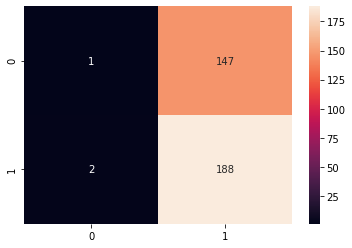

In [65]:
matrix = confusion_matrix(test['final_label'], predictions_df)
score = accuracy_score(test['final_label'], predictions_df)
report = classification_report(test['final_label'], predictions_df)
print(matrix)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')
print('Accuracy score: {}'.format(score))


### Second -----------------Training model -----> XGBoost Model - no HyperParameterTuningwith Countvectorizer 

In [66]:
n_gram = [1,2,3,4,5]


for j in n_gram:
    countvectors_xg_no = CountVectorizer(ngram_range=(j,j))
    traindataset = countvectors_xg_no.fit_transform(corpus_train)
    testdataset = countvectors_xg_no.transform(corpus_test)

    model_xgb = XGBClassifier(random_state = 42)
    model_xgb.fit(pd.DataFrame(traindataset.todense() , columns = countvectors_xg_no.get_feature_names()), train['final_label'])

    y_pred_xgb = model_xgb.predict(pd.DataFrame(testdataset.todense(), columns=countvectors_xg_no.get_feature_names()))
    score_xgb_no = accuracy_score(test['final_label'], y_pred_xgb)
    matrix_xgb_no = confusion_matrix(test['final_label'], y_pred_xgb)
    print('ngram range used : ({},{})'.format(j,j))
    print(score_xgb_no)
    print(matrix_xgb_no)
        

ngram range used : (1,1)
0.5562130177514792
[[ 42 106]
 [ 44 146]]
ngram range used : (2,2)
0.5532544378698225
[[ 16 132]
 [ 19 171]]
ngram range used : (3,3)
0.5621301775147929
[[ 15 133]
 [ 15 175]]
ngram range used : (4,4)
0.5591715976331361
[[  6 142]
 [  7 183]]
ngram range used : (5,5)
0.5680473372781065
[[ 25 123]
 [ 23 167]]


In [67]:
bst = 0.5680473372781065
print('The best Score achieved from the XGBoost model without any hypertuning : {}'.format(round(bst, 4)))

The best Score achieved from the XGBoost model without any hypertuning : 0.568


### Third -----------------Training model ----->  XGBOOST with HPT

In [68]:
def performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [70]:
countvectors_xg = CountVectorizer(ngram_range=(4,4), max_features = 700)
traindataset = countvectors_xg.fit_transform(corpus_train)
testdataset = countvectors_xg.transform(corpus_test)


param_grid = { 'n_estimators': [500,550,600,650],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None,3, 5 , 10, 15],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65,0.9],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']}

xgboost_md = XGBClassifier(random_state = 42)
model_xg_cv = RandomizedSearchCV(estimator = xgboost_md, param_distributions = param_grid, cv=5, verbose = 2, n_jobs= 2)
model_xg_cv.fit(pd.DataFrame(traindataset.todense(),columns =countvectors_xg.get_feature_names()),  train['final_label'])

performance(model_xg_cv,'XGB')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGB
Best Score: 0.5425920612147298
Best Parameters: {'subsample': 0.55, 'sampling_method': 'uniform', 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 600, 'min_child_weight': 0.01, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 2, 'colsample_bytree': 0.75}


In [71]:
model_xg_cv_best = model_xg_cv.best_estimator_
model_xg_cv_best.fit(traindataset,train['final_label'])

XGBClassifier(colsample_bytree=0.75, gamma=2, learning_rate=0.5,
              min_child_weight=0.01, n_estimators=600, random_state=42,
              reg_alpha=1, reg_lambda=5, sampling_method='uniform',
              subsample=0.55)

In [72]:
y_pred_xgb = model_xg_cv_best.predict(testdataset)

In [73]:
score_xgb = accuracy_score(test['final_label'],y_pred_xgb )
matrix_xgb = confusion_matrix(test['final_label'], y_pred_xgb)

print(score_xgb)
print(matrix_xgb)

0.5710059171597633
[[ 33 115]
 [ 30 160]]


<AxesSubplot:>

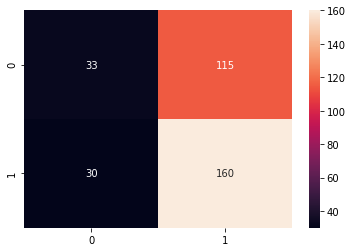

In [74]:
sns.heatmap(matrix_xgb, annot=True, fmt='g')

### Fourth-----------------Training model ----->  Catboost Model

In [75]:
# the traindataset and the test data set will be the same as given for xgboost model
from catboost import CatBoostClassifier
countvectors_cat = CountVectorizer(ngram_range=(4,4), max_features=1000)
traindataset =countvectors_cat.fit_transform(corpus_train)
testdataset = countvectors_cat.transform(corpus_test)

model_catboost = CatBoostClassifier(random_state = 42)
model_catboost.fit(pd.DataFrame(traindataset.todense(), columns = countvectors_cat.get_feature_names()), train['final_label'])



Learning rate set to 0.010394
0:	learn: 0.6929138	total: 200ms	remaining: 3m 19s
1:	learn: 0.6926126	total: 204ms	remaining: 1m 41s
2:	learn: 0.6923623	total: 209ms	remaining: 1m 9s
3:	learn: 0.6920889	total: 215ms	remaining: 53.4s
4:	learn: 0.6918336	total: 221ms	remaining: 43.9s
5:	learn: 0.6916617	total: 225ms	remaining: 37.3s
6:	learn: 0.6914392	total: 229ms	remaining: 32.4s
7:	learn: 0.6911897	total: 232ms	remaining: 28.8s
8:	learn: 0.6908899	total: 235ms	remaining: 25.9s
9:	learn: 0.6906738	total: 239ms	remaining: 23.7s
10:	learn: 0.6904900	total: 243ms	remaining: 21.8s
11:	learn: 0.6902922	total: 246ms	remaining: 20.3s
12:	learn: 0.6900516	total: 250ms	remaining: 19s
13:	learn: 0.6898384	total: 253ms	remaining: 17.8s
14:	learn: 0.6896444	total: 257ms	remaining: 16.9s
15:	learn: 0.6895036	total: 261ms	remaining: 16.1s
16:	learn: 0.6892639	total: 264ms	remaining: 15.3s
17:	learn: 0.6889431	total: 268ms	remaining: 14.6s
18:	learn: 0.6886923	total: 272ms	remaining: 14s
19:	learn: 0.

176:	learn: 0.6665755	total: 912ms	remaining: 4.24s
177:	learn: 0.6664216	total: 916ms	remaining: 4.23s
178:	learn: 0.6663424	total: 920ms	remaining: 4.22s
179:	learn: 0.6662102	total: 923ms	remaining: 4.21s
180:	learn: 0.6660895	total: 928ms	remaining: 4.2s
181:	learn: 0.6660047	total: 932ms	remaining: 4.19s
182:	learn: 0.6658530	total: 936ms	remaining: 4.18s
183:	learn: 0.6657787	total: 940ms	remaining: 4.17s
184:	learn: 0.6656977	total: 945ms	remaining: 4.16s
185:	learn: 0.6655935	total: 948ms	remaining: 4.15s
186:	learn: 0.6654930	total: 952ms	remaining: 4.14s
187:	learn: 0.6653831	total: 955ms	remaining: 4.13s
188:	learn: 0.6652297	total: 959ms	remaining: 4.11s
189:	learn: 0.6650742	total: 962ms	remaining: 4.1s
190:	learn: 0.6649943	total: 966ms	remaining: 4.09s
191:	learn: 0.6648968	total: 971ms	remaining: 4.08s
192:	learn: 0.6647689	total: 975ms	remaining: 4.08s
193:	learn: 0.6645949	total: 979ms	remaining: 4.07s
194:	learn: 0.6643995	total: 983ms	remaining: 4.06s
195:	learn: 0.

368:	learn: 0.6480140	total: 1.63s	remaining: 2.79s
369:	learn: 0.6479322	total: 1.64s	remaining: 2.79s
370:	learn: 0.6478434	total: 1.64s	remaining: 2.78s
371:	learn: 0.6477780	total: 1.64s	remaining: 2.77s
372:	learn: 0.6477328	total: 1.65s	remaining: 2.77s
373:	learn: 0.6476199	total: 1.65s	remaining: 2.77s
374:	learn: 0.6475117	total: 1.66s	remaining: 2.76s
375:	learn: 0.6474525	total: 1.66s	remaining: 2.76s
376:	learn: 0.6473854	total: 1.66s	remaining: 2.75s
377:	learn: 0.6473112	total: 1.67s	remaining: 2.75s
378:	learn: 0.6472090	total: 1.67s	remaining: 2.74s
379:	learn: 0.6471527	total: 1.68s	remaining: 2.73s
380:	learn: 0.6470842	total: 1.68s	remaining: 2.73s
381:	learn: 0.6469771	total: 1.69s	remaining: 2.73s
382:	learn: 0.6468929	total: 1.69s	remaining: 2.72s
383:	learn: 0.6468517	total: 1.69s	remaining: 2.72s
384:	learn: 0.6467151	total: 1.7s	remaining: 2.71s
385:	learn: 0.6466353	total: 1.7s	remaining: 2.71s
386:	learn: 0.6465433	total: 1.71s	remaining: 2.7s
387:	learn: 0.6

565:	learn: 0.6319541	total: 2.35s	remaining: 1.8s
566:	learn: 0.6318838	total: 2.36s	remaining: 1.8s
567:	learn: 0.6318212	total: 2.36s	remaining: 1.79s
568:	learn: 0.6317674	total: 2.37s	remaining: 1.79s
569:	learn: 0.6316952	total: 2.37s	remaining: 1.79s
570:	learn: 0.6316040	total: 2.37s	remaining: 1.78s
571:	learn: 0.6315429	total: 2.38s	remaining: 1.78s
572:	learn: 0.6314867	total: 2.38s	remaining: 1.77s
573:	learn: 0.6314338	total: 2.38s	remaining: 1.77s
574:	learn: 0.6313576	total: 2.39s	remaining: 1.76s
575:	learn: 0.6312984	total: 2.39s	remaining: 1.76s
576:	learn: 0.6311859	total: 2.39s	remaining: 1.75s
577:	learn: 0.6310888	total: 2.4s	remaining: 1.75s
578:	learn: 0.6309686	total: 2.4s	remaining: 1.75s
579:	learn: 0.6308855	total: 2.4s	remaining: 1.74s
580:	learn: 0.6308113	total: 2.41s	remaining: 1.74s
581:	learn: 0.6307385	total: 2.41s	remaining: 1.73s
582:	learn: 0.6307162	total: 2.42s	remaining: 1.73s
583:	learn: 0.6306351	total: 2.42s	remaining: 1.72s
584:	learn: 0.630

740:	learn: 0.6178275	total: 3.07s	remaining: 1.07s
741:	learn: 0.6177346	total: 3.07s	remaining: 1.07s
742:	learn: 0.6176501	total: 3.08s	remaining: 1.06s
743:	learn: 0.6175447	total: 3.08s	remaining: 1.06s
744:	learn: 0.6174823	total: 3.08s	remaining: 1.06s
745:	learn: 0.6173999	total: 3.09s	remaining: 1.05s
746:	learn: 0.6173212	total: 3.09s	remaining: 1.05s
747:	learn: 0.6172266	total: 3.1s	remaining: 1.04s
748:	learn: 0.6171423	total: 3.1s	remaining: 1.04s
749:	learn: 0.6170560	total: 3.11s	remaining: 1.03s
750:	learn: 0.6169272	total: 3.11s	remaining: 1.03s
751:	learn: 0.6168398	total: 3.12s	remaining: 1.03s
752:	learn: 0.6167163	total: 3.12s	remaining: 1.02s
753:	learn: 0.6165830	total: 3.12s	remaining: 1.02s
754:	learn: 0.6164842	total: 3.13s	remaining: 1.01s
755:	learn: 0.6163994	total: 3.13s	remaining: 1.01s
756:	learn: 0.6163131	total: 3.14s	remaining: 1.01s
757:	learn: 0.6162444	total: 3.14s	remaining: 1s
758:	learn: 0.6161175	total: 3.15s	remaining: 999ms
759:	learn: 0.616

921:	learn: 0.6009734	total: 6.91s	remaining: 585ms
922:	learn: 0.6008670	total: 6.92s	remaining: 577ms
923:	learn: 0.6007830	total: 6.93s	remaining: 570ms
924:	learn: 0.6006839	total: 6.93s	remaining: 562ms
925:	learn: 0.6005963	total: 6.94s	remaining: 555ms
926:	learn: 0.6005106	total: 6.95s	remaining: 547ms
927:	learn: 0.6004068	total: 6.96s	remaining: 540ms
928:	learn: 0.6003401	total: 6.97s	remaining: 532ms
929:	learn: 0.6002561	total: 6.97s	remaining: 525ms
930:	learn: 0.6002007	total: 6.98s	remaining: 517ms
931:	learn: 0.6001460	total: 6.99s	remaining: 510ms
932:	learn: 0.6000492	total: 7s	remaining: 502ms
933:	learn: 0.5999449	total: 7s	remaining: 495ms
934:	learn: 0.5998712	total: 7.01s	remaining: 487ms
935:	learn: 0.5997971	total: 7.02s	remaining: 480ms
936:	learn: 0.5996852	total: 7.03s	remaining: 473ms
937:	learn: 0.5995981	total: 7.04s	remaining: 465ms
938:	learn: 0.5995053	total: 7.04s	remaining: 458ms
939:	learn: 0.5994531	total: 7.05s	remaining: 450ms
940:	learn: 0.5992

In [76]:
y_pred_catboost = model_catboost.predict(pd.DataFrame(testdataset.todense(), columns = countvectors_cat.get_feature_names()))
score_catboost_no = accuracy_score(test['final_label'], y_pred_catboost)
matrix_catboost_no = confusion_matrix(test['final_label'], y_pred_catboost)

print(score_catboost_no)
print(matrix_catboost_no)


0.5532544378698225
[[  4 144]
 [  7 183]]


<AxesSubplot:>

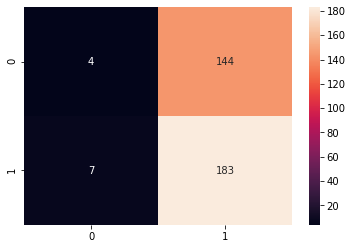

In [77]:
import seaborn as sns
sns.heatmap(matrix_catboost_no, annot=True, fmt='g')

In [78]:
print(accuracy_score(test['final_label'], y_pred_catboost))

0.5532544378698225


In [79]:
report = classification_report(test['final_label'],  y_pred_catboost)
print(report)

              precision    recall  f1-score   support

           0       0.36      0.03      0.05       148
           1       0.56      0.96      0.71       190

    accuracy                           0.55       338
   macro avg       0.46      0.50      0.38       338
weighted avg       0.47      0.55      0.42       338



# Final Conclusions

In [80]:
print('With Random Forest model, ACCURACY: {}'.format(round(score, 4)))
print('with XGBOOST (no HPT), ACCURACY: {} {}'.format(round(bst, 4), (5, 5)))
print('With XGBOOST (HPT), ACCURACY: {}'.format(round(score_xgb, 4)))
print('With Catboost Model, ACCURACY: {}'.format(round(score_catboost_no, 4)))


With Random Forest model, ACCURACY: 0.5592
with XGBOOST (no HPT), ACCURACY: 0.568 (5, 5)
With XGBOOST (HPT), ACCURACY: 0.571
With Catboost Model, ACCURACY: 0.5533


### The final LSTM model on the basis of Polarity and Subjectivity of the words in news.

In [182]:
df_news_lstm = pd.read_csv(r'D:\internship\final_news.csv', index_col='date', parse_dates=True)
df_price_lstm = pd.read_csv('D:\internship\datasets\Price\BTC_29-04-2013_22-02-2021.csv', index_col='Date', parse_dates=True)


In [183]:
df_news_lstm.head()

,headline,extra
date,,
2021-02-22,3 Bitcoin price metrics show bulls were not fa...,Today’s $1.6 billion Bitcoin liquidation event...
2021-02-22,Can’t beat ‘em? Join ‘em: Mastercard and Visa ...,Mastercard is set to open the shop doors to cr...
2021-02-22,Up to 5% of public companies will follow Tesla...,"Dan Ives, Wedbush Securities’ managing directo..."
2021-02-22,Bitcoin prints biggest hourly candle in histor...,Fresh criticism from the U.S. treasury secreta...
2021-02-22,"Bitcoin price crashes below $48K, but is the b...","Bitcoin price dropped below $48,000 in a major..."


In [184]:
df_price_lstm.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2021-02-22,57532.738864,57533.389325,48967.565188,54207.319065,9.205242e+10,1.010205e+12
2021-02-21,56068.568246,58330.572142,55672.609513,57539.943668,5.189759e+10,1.072263e+12
2021-02-20,55887.335714,57505.228187,54626.559776,56099.520513,6.814546e+10,1.045371e+12
2021-02-19,51675.981285,56113.650547,50937.275722,55888.133682,6.349550e+10,1.041381e+12
2021-02-18,52140.972717,52474.107249,51015.764554,51679.796694,5.205472e+10,9.629151e+11


In [185]:
start_date = '2019-08-01'
end_date = '2021-02-21'

In [186]:
df_news_lstm = df_news_lstm.loc[start_date:end_date]

In [187]:
df_news_lstm

,headline,extra
date,,
2021-02-21,"Banks will be required to work with crypto, e-...",The global monetary landscape will have everyo...
2021-02-21,A Bitcoin price dip for ants? BTC quickly rebo...,The price of Bitcoin achieved a new all-time h...
2021-02-20,Bitcoin skeptic debates Bloomberg analyst in l...,Economist Frances Coppola and senior commodity...
2021-02-20,"Elon Musk says BTC, ETH prices “high” while du...","While Musk said Schiff ""might as well"" have cr..."
2021-02-20,Bitcoin price must now hold above these levels...,"It’s important for Bitcoin to hold above $50,0..."
...,...,...
2019-08-01,Wall Street’s Bill Miller: 'Bitcoin Has Potent...,https://cointelegraph.com/news/wall-streets-bi...
2019-08-01,ETH Dev Suggests Moving to ‘ASIC-Friendly Algo...,https://cointelegraph.com/news/eth-dev-suggest...
2019-08-01,"Crypto Markets See Mixed Signals, Bitcoin Stil...",https://cointelegraph.com/news/crypto-markets-...


In [188]:
from textblob import TextBlob

In [189]:
df_news_lstm['polarity'] = df_news_lstm.apply(lambda x: TextBlob(x['headline']).sentiment.polarity, axis=1)
df_news_lstm['subjectivity'] = df_news_lstm.apply(lambda x: TextBlob(x['headline']).sentiment.subjectivity, axis=1)

In [190]:
df_news_lstm.head()

,headline,extra,polarity,subjectivity
date,,,,
2021-02-21,"Banks will be required to work with crypto, e-...",The global monetary landscape will have everyo...,0.000000,0.000000
2021-02-21,A Bitcoin price dip for ants? BTC quickly rebo...,The price of Bitcoin achieved a new all-time h...,0.157424,0.398636
2021-02-20,Bitcoin skeptic debates Bloomberg analyst in l...,Economist Frances Coppola and senior commodity...,0.500000,0.900000
2021-02-20,"Elon Musk says BTC, ETH prices “high” while du...","While Musk said Schiff ""might as well"" have cr...",0.160000,0.540000
2021-02-20,Bitcoin price must now hold above these levels...,"It’s important for Bitcoin to hold above $50,0...",0.000000,0.100000


In [191]:
df_sentiment = df_news_lstm.groupby(by='date').mean()
df_sentiment

,polarity,subjectivity
date,,
2019-08-01,0.087131,0.213164
2019-08-02,0.045559,0.287033
2019-08-03,-0.008923,0.168519
2019-08-04,0.033785,0.393439
2019-08-05,0.166204,0.344444
...,...,...
2021-02-17,0.055638,0.120957
2021-02-18,0.095539,0.427898
2021-02-19,0.025365,0.194421


In [192]:
import seaborn as sns
sns.set(style='whitegrid', palette='Set2')

<AxesSubplot:title={'center':'Price'}, xlabel='Date'>

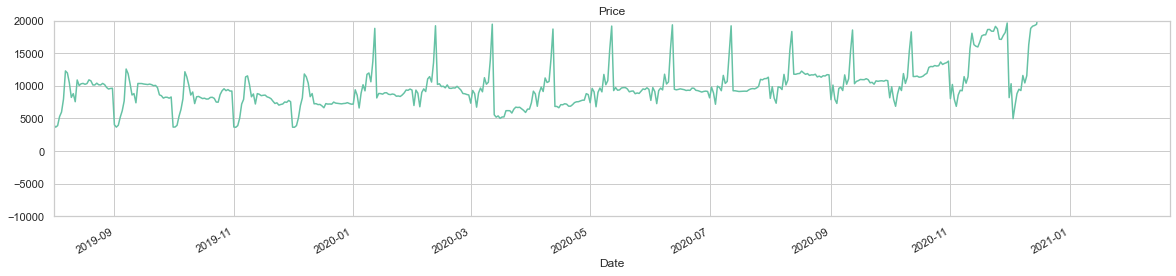

In [193]:
df_price_lstm['Close'].plot(xlim=[start_date, end_date], figsize=(20, 4), ylim=[-10000, 20000], title='Price')

<AxesSubplot:title={'center':'Polarity'}, xlabel='date'>

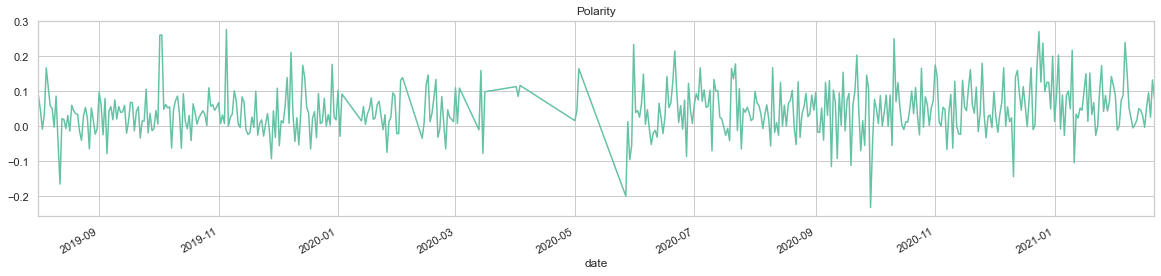

In [194]:
df_sentiment['polarity'].plot(xlim=[start_date, end_date], figsize=(20, 4), sharey=True, title='Polarity')

<AxesSubplot:title={'center':'subjectivity'}, xlabel='date'>

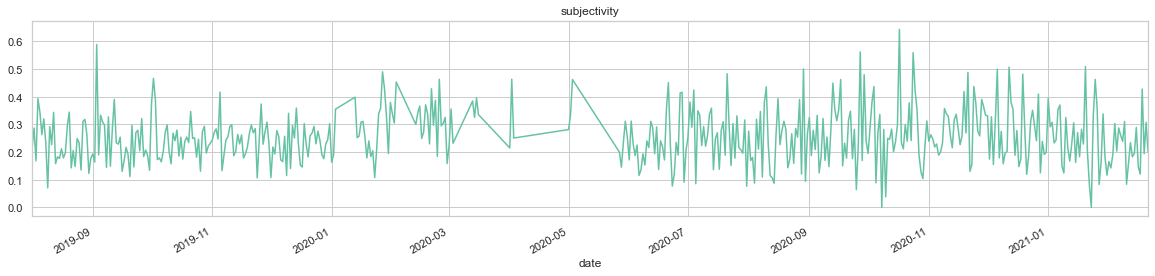

In [195]:
df_sentiment['subjectivity'].plot(xlim=[start_date, end_date], figsize=(20, 4), sharey=True, title='subjectivity')

In [197]:
filtered_polarity = df_sentiment['polarity'].apply(lambda x: 1 if x > 0.2 else (-1 if x < -0.2 else 0))
df_sentiment['filtered_polarity'] = filtered_polarity

<AxesSubplot:xlabel='date'>

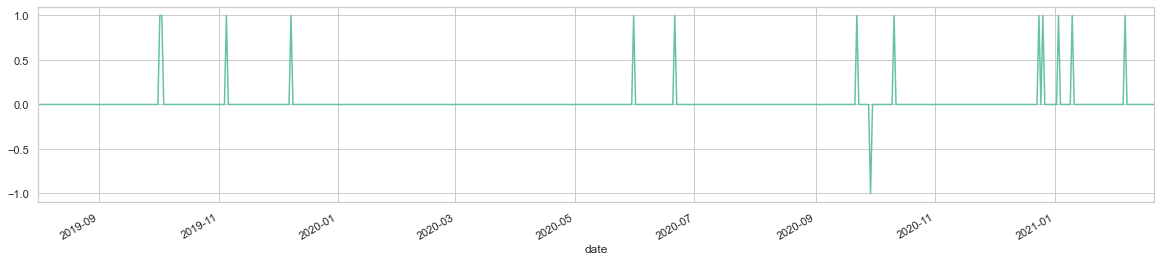

In [198]:
df_sentiment['filtered_polarity'].plot(xlim=[start_date, end_date], figsize=(20, 4), sharey=True)

In [199]:
filtered_subjectivity = df_sentiment['subjectivity'].apply(lambda x: 1 if x > 0.2 else (-1 if x < -0.2 else 0))
df_sentiment['filtered_subjectivity'] = filtered_subjectivity

<AxesSubplot:title={'center':'filtered_subjectivity'}, xlabel='date'>

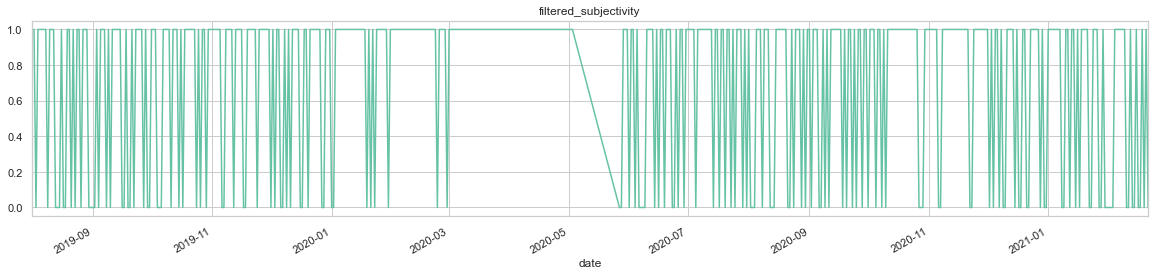

In [200]:
df_sentiment['filtered_subjectivity'].plot(xlim=[start_date, end_date], figsize=(20, 4), sharey=True, title='filtered_subjectivity')

In [201]:
df_sentiment.head()

,polarity,subjectivity,filtered_polarity,filtered_subjectivity
date,,,,
2019-08-01,0.087131,0.213164,0,1
2019-08-02,0.045559,0.287033,0,1
2019-08-03,-0.008923,0.168519,0,0
2019-08-04,0.033785,0.393439,0,1
2019-08-05,0.166204,0.344444,0,1


In [202]:
df_price_lstm.shape

(2857, 6)

In [203]:
df_sentiment.shape

(479, 4)

In [204]:
combined_data = pd.merge(df_sentiment, df_price_lstm,left_index=True, right_index=True, how='inner')
combined_data.head()

,polarity,subjectivity,filtered_polarity,filtered_subjectivity,Open,High,Low,Close,Volume,Market Cap
2019-08-01,0.087131,0.213164,0,1,4028.472072,4109.021065,3996.955256,4030.847999,5.306593e+09,7.042274e+10
2019-08-02,0.045559,0.287033,0,1,3401.376433,3695.613975,3391.023752,3666.780351,7.735623e+09,6.427027e+10
2019-08-03,-0.008923,0.168519,0,0,3913.225936,3950.432238,3875.228424,3901.131624,1.063864e+10,6.857458e+10
2019-08-04,0.033785,0.393439,0,1,5199.835378,5318.836488,5148.211814,5289.771040,1.715411e+10,9.328637e+10
2019-08-05,0.166204,0.344444,0,1,5849.481350,5989.981147,5794.715649,5982.457323,1.532061e+10,1.058291e+11


In [205]:
combined_data.tail()

,polarity,subjectivity,filtered_polarity,filtered_subjectivity,Open,High,Low,Close,Volume,Market Cap
2021-02-17,0.055638,0.120957,0,0,49207.276432,52533.914312,49072.377140,52149.007536,8.082055e+10,9.716116e+11
2021-02-18,0.095539,0.427898,0,1,52140.972717,52474.107249,51015.764554,51679.796694,5.205472e+10,9.629151e+11
2021-02-19,0.025365,0.194421,0,0,51675.981285,56113.650547,50937.275722,55888.133682,6.349550e+10,1.041381e+12
2021-02-20,0.132000,0.308000,0,1,55887.335714,57505.228187,54626.559776,56099.520513,6.814546e+10,1.045371e+12
2021-02-21,0.078712,0.199318,0,0,56068.568246,58330.572142,55672.609513,57539.943668,5.189759e+10,1.072263e+12


In [206]:
combined_data.shape

(459, 10)

In [207]:
combined_data.to_csv('combined_data.csv', index=True)

### Preprocessing

In [208]:
df_data_lstm  = pd.read_csv(r'D:\internship\datasets\combined_data.csv')

In [209]:
df_data_lstm.head()

,Unnamed: 0,polarity,subjectivity,filtered_polarity,filtered_subjectivity,Open,High,Low,Close,Volume,Market Cap
0,2019-08-01,0.087131,0.213164,0,1,4028.472072,4109.021065,3996.955256,4030.847999,5.306593e+09,7.042274e+10
1,2019-08-02,0.045559,0.287033,0,1,3401.376433,3695.613975,3391.023752,3666.780351,7.735623e+09,6.427027e+10
2,2019-08-03,-0.008923,0.168519,0,0,3913.225936,3950.432238,3875.228424,3901.131624,1.063864e+10,6.857458e+10
3,2019-08-04,0.033785,0.393439,0,1,5199.835378,5318.836488,5148.211814,5289.771040,1.715411e+10,9.328637e+10
4,2019-08-05,0.166204,0.344444,0,1,5849.481350,5989.981147,5794.715649,5982.457323,1.532061e+10,1.058291e+11


In [210]:
df_data_lstm.columns

Index(['Unnamed: 0', 'polarity', 'subjectivity', 'filtered_polarity',
       'filtered_subjectivity', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')

In [211]:
df_data_lstm.columns = ['date', 'polarity', 'subjectivity', 'filtered_polarity',
       'filtered_subjectivity', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap']

In [212]:
df_data_lstm

,date,polarity,subjectivity,filtered_polarity,filtered_subjectivity,Open,High,Low,Close,Volume,Market Cap
0,2019-08-01,0.087131,0.213164,0,1,4028.472072,4109.021065,3996.955256,4030.847999,5.306593e+09,7.042274e+10
1,2019-08-02,0.045559,0.287033,0,1,3401.376433,3695.613975,3391.023752,3666.780351,7.735623e+09,6.427027e+10
2,2019-08-03,-0.008923,0.168519,0,0,3913.225936,3950.432238,3875.228424,3901.131624,1.063864e+10,6.857458e+10
3,2019-08-04,0.033785,0.393439,0,1,5199.835378,5318.836488,5148.211814,5289.771040,1.715411e+10,9.328637e+10
4,2019-08-05,0.166204,0.344444,0,1,5849.481350,5989.981147,5794.715649,5982.457323,1.532061e+10,1.058291e+11
...,...,...,...,...,...,...,...,...,...,...,...
454,2021-02-17,0.055638,0.120957,0,0,49207.276432,52533.914312,49072.377140,52149.007536,8.082055e+10,9.716116e+11
455,2021-02-18,0.095539,0.427898,0,1,52140.972717,52474.107249,51015.764554,51679.796694,5.205472e+10,9.629151e+11
456,2021-02-19,0.025365,0.194421,0,0,51675.981285,56113.650547,50937.275722,55888.133682,6.349550e+10,1.041381e+12
457,2021-02-20,0.132000,0.308000,0,1,55887.335714,57505.228187,54626.559776,56099.520513,6.814546e+10,1.045371e+12


In [213]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [229]:
series_length = 15
prediction_length = 3
training_period = 16
test_period = 2

In [230]:
dt_training_start = datetime.strptime(start_date, '%Y-%m-%d')
dt_test_start = dt_training_start + relativedelta(months=training_period)
dt_training_end = dt_test_start + relativedelta(days=-1)
dt_test_end = dt_training_end + relativedelta(months=test_period)

In [231]:
str_training_start = "{:%Y-%m-%d}".format(dt_training_start)
str_training_end = "{:%Y-%m-%d}".format(dt_training_end)

In [232]:
str_test_start = "{:%Y-%m-%d}".format(dt_test_start)
str_test_end = "{:%Y-%m-%d}".format(dt_test_end)

In [233]:
print("training_start: {}, training_end: {}".format(str_training_start, str_training_end))
print("test_start: {}, test_end: {}".format(str_test_start, str_test_end))

training_start: 2019-08-01, training_end: 2020-11-30
test_start: 2020-12-01, test_end: 2021-01-30


In [235]:
df_train = df_data_lstm[(df_data_lstm.date >= str_training_start) & (df_data_lstm.date <= str_training_end)]
df_train

,date,polarity,subjectivity,filtered_polarity,filtered_subjectivity,Open,High,Low,Close,Volume,Market Cap
0,2019-08-01,0.087131,0.213164,0,1,4028.472072,4109.021065,3996.955256,4030.847999,5.306593e+09,7.042274e+10
1,2019-08-02,0.045559,0.287033,0,1,3401.376433,3695.613975,3391.023752,3666.780351,7.735623e+09,6.427027e+10
2,2019-08-03,-0.008923,0.168519,0,0,3913.225936,3950.432238,3875.228424,3901.131624,1.063864e+10,6.857458e+10
3,2019-08-04,0.033785,0.393439,0,1,5199.835378,5318.836488,5148.211814,5289.771040,1.715411e+10,9.328637e+10
4,2019-08-05,0.166204,0.344444,0,1,5849.481350,5989.981147,5794.715649,5982.457323,1.532061e+10,1.058291e+11
...,...,...,...,...,...,...,...,...,...,...,...
391,2020-11-26,0.033523,0.276326,0,1,18729.840587,18866.286130,16351.034854,17150.623578,6.139684e+10,3.182320e+11
392,2020-11-27,-0.033333,0.258889,0,1,17153.913125,17445.024286,16526.423528,17108.401728,3.888649e+10,3.174645e+11
393,2020-11-28,0.027273,0.390909,0,1,17112.934238,17853.939191,16910.652711,17717.415011,3.260104e+10,3.287828e+11
394,2020-11-29,0.032083,0.364444,0,1,17719.634614,18283.628173,17559.117622,18177.483420,3.113396e+10,3.373366e+11


In [237]:
df_test = df_data_lstm[(df_data_lstm.date >= str_test_start) & (df_data_lstm.date <= str_test_end)]
df_test.head()

,date,polarity,subjectivity,filtered_polarity,filtered_subjectivity,Open,High,Low,Close,Volume,Market Cap
396,2020-12-01,0.099341,0.331296,0,1,8033.261846,8200.063470,8009.058884,8192.494005,2.290344e+10,1.487530e+11
397,2020-12-02,0.025877,0.174561,0,0,10202.387654,10393.611723,10202.387654,10326.054525,4.344430e+10,1.880812e+11
398,2020-12-03,-0.017392,0.327781,0,1,7913.616388,7929.116019,4860.353830,4970.787901,5.398036e+10,9.080461e+10
399,2020-12-04,0.033333,0.155556,0,0,6858.068025,7119.947062,6811.077900,6971.091591,3.575957e+10,1.277168e+11
400,2020-12-05,0.066667,0.316667,0,1,8610.386212,8949.897979,8569.643988,8804.477811,4.214272e+10,1.617916e+11


In [238]:
df_data = pd.concat([df_train, df_test])

## Preprocessing

In [250]:
from sklearn import preprocessing

def preprocess(dataframe, isTraining):
    df = dataframe.copy()
    df["future_price"] = df['Close'].shift(-prediction_length)
    
    # Drop any NaN values
    df.dropna(inplace=True)
    
    # Compare future BTC price with today's price and labeling it as 1 if price increases and zero otherwise
    df["label"] = np.where(df["future_price"] >= df["Close"], 1, 0)
    
    # Drop 'future_price' column as it is no longer required
    df.drop('future_price', 1, inplace=True)
    
    temp = df.loc[:, df.columns != 'label']
        
    cols = temp.columns
    scaler = preprocessing.StandardScaler()
    scaled_df = scaler.fit_transform(temp)
    temp = pd.DataFrame(scaled_df, columns=cols)
        
    sequence = []
    
    for i in range (len(temp) - series_length):
        sequence.append([np.array(temp[i:i+series_length]), df.iloc[i+series_length, -1]])
    
    X = []
    y = []
    
    increases = []
    decreases = []
    
    for seq, label in sequence:
        if label == 0:
            decreases.append([seq, label])
        else:
            increases.append([seq, label])
            
    len_increases = len(increases)
    len_decreases = len(decreases)
            
    print("increase_count= {} , decrease_count= {}".format(len_increases, len_decreases))
    
    if isTraining:
        if(len_increases < len_decreases):
            increases = increases[:len_increases]
            decreases = decreases[:len_increases]
        else:
            increases = increases[:len_decreases]
            decreases = decreases[:len_decreases]
            
    print("increase_count= {} , decrease_count= {}\n".format(len(increases), len(decreases)))
    
    sequence = increases + decreases
    
    if isTraining:
        np.random.seed(42)
        np.random.shuffle(sequence)
    
    for seq ,label in sequence:
        X.append(seq)
        y.append(label)
        
    return np.array(X), np.array(y)

In [251]:
selected_features = ['filtered_polarity','subjectivity', 'Open', 'Close', 'High', 'Low', 'Volume', 'Market Cap']

In [252]:
df_test_for_sequence = df_data[len(df_data) - len(df_test) - series_length:]

In [253]:
X_train, y_train = preprocess(df_train[selected_features], True)
X_test, y_test = preprocess(df_test_for_sequence[selected_features], False)

increase_count= 197 , decrease_count= 181
increase_count= 181 , decrease_count= 181

increase_count= 33 , decrease_count= 15
increase_count= 33 , decrease_count= 15



In [254]:
X_train.shape

(362, 15, 8)

In [255]:
X_train[0]


array([[-1.18524956e-01,  2.64269610e-01,  1.84463514e-01,
         3.63152669e-01,  3.03474228e-01,  2.53622000e-01,
         1.83545310e+00,  3.99792915e-01],
       [-1.18524956e-01, -2.02212945e+00,  3.64841092e-01,
         3.39459364e-01,  3.05769349e-01,  3.79135791e-01,
         1.15822490e+00,  3.76759099e-01],
       [-1.18524956e-01, -3.14313707e-01,  3.41767784e-01,
         3.59865927e-01,  3.04145674e-01,  4.11059993e-01,
         1.81009932e+00,  3.96948189e-01],
       [-1.18524956e-01,  3.20122656e+00,  3.59835592e-01,
         3.68501106e-01,  3.14853587e-01,  3.95034369e-01,
         2.40894010e+00,  4.05615393e-01],
       [-1.18524956e-01, -9.19443035e-01,  3.70299652e-01,
         3.45417064e-01,  3.63721351e-01,  4.24286912e-01,
         1.88914059e+00,  3.83173156e-01],
       [-6.77285461e+00,  2.33576674e+00,  3.46723256e-01,
         3.92905944e-01,  3.34219523e-01,  4.04634633e-01,
         1.78663295e+00,  4.29888457e-01],
       [-1.18524956e-01, -1.808267

## Building the Final Model ----> Visualizing through RNN LSTM

In [258]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.utils import plot_model

Using TensorFlow backend.


In [259]:
def create_model():
    model=Sequential()
    model.add(LSTM(256,input_shape=(X_train.shape[1:]),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(LSTM(256,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(LSTM(256,return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2,activation='softmax'))
    
    return model

In [260]:
model = create_model()

In [261]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 15, 256)           271360    
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 256)           1024      
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 256)           525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 256)           1024      
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)              

In [263]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

batch_size = 32
epochs = 50

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=False,
                    validation_split=0.1)

In [264]:
import matplotlib.pyplot as plt

def plot_accuracy(hist):
    epoch_list=list(range(1, len(hist.history['accuracy']) + 1)) # values for x axis [1, 2, 3, 4, ..., # of epochs]
    plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
    plt.legend(('Training Accuracy', 'Validation Accuracy'))
    plt.show()

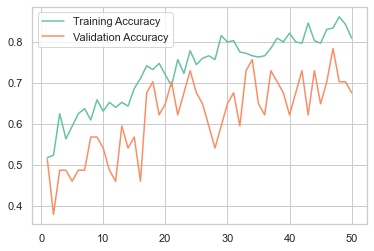

In [265]:
plot_accuracy(history)

In [266]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

48/48 [==============================] - 0s 1ms/step
Test score: 0.952472964922587
Test accuracy: 0.5625


In [267]:
predictions = model.predict(X_test, verbose=1)
predictions = np.argmax(predictions, axis=-1)

48/48 [==============================] - 0s 6ms/step


In [268]:
# np.savetxt('predictions', predictions, delimiter=',')

In [269]:
matrix = confusion_matrix(y_test, predictions.round())
print('confusion_matrix')
print(matrix)

confusion_matrix
[[ 7  8]
 [13 20]]


In [270]:
report = classification_report(y_test, predictions.round())
print(report)

              precision    recall  f1-score   support

           0       0.35      0.47      0.40        15
           1       0.71      0.61      0.66        33

    accuracy                           0.56        48
   macro avg       0.53      0.54      0.53        48
weighted avg       0.60      0.56      0.58        48



In [271]:
model.save('sentiment-lstm.h5')

### In the end with LSTM model also i get a accuracy score of nearly 56 %.

### Overall the XGBOOST and random forest model were also performing well.